In [1]:
import pandas as pd
from typing import List, Tuple
import matplotlib.pyplot as plt

In [7]:
def calculate_transaction_costs(TA_treatment_high: bool, total_bargaining_time: int) -> Tuple[List[float], List[float]]:
    """
    Calculate the total cost over time with a decay factor depending on the treatment and
    compute the difference between each consecutive cost.

    Args:
        TA_treatment_high (bool): Whether the treatment for Transactional Adjustment is high.
        total_bargaining_time (int): Total time in seconds for which the costs are to be calculated.

    Returns:
        Tuple[List[float], List[float]]: 
        - A list of cumulative costs at each second.
        - A list of differences between each second's cost and the next.
    """
    total_cost_list = []
    cumulative_cost_list = []
    current_cost_list = []
    
    decay_factor = 0.99 if TA_treatment_high else 0.93
    base_cost = 0.25

    # Calculate the cost for each second
    for t in range(total_bargaining_time):
        cost_at_t = base_cost * (decay_factor **  t)
        total_cost_list.append(cost_at_t)

    cumulative_cost_list = pd.Series(total_cost_list).cumsum().tolist()
    
    # Calculate the difference between current and next second costs
    for i in range(len(total_cost_list) - 1):
        current_cost = total_cost_list[i] - total_cost_list[i + 1]
        current_cost_list.append(current_cost)

    # Append 0 for the last entry, as specified
    current_cost_list.append(0.0)

    return cumulative_cost_list, current_cost_list

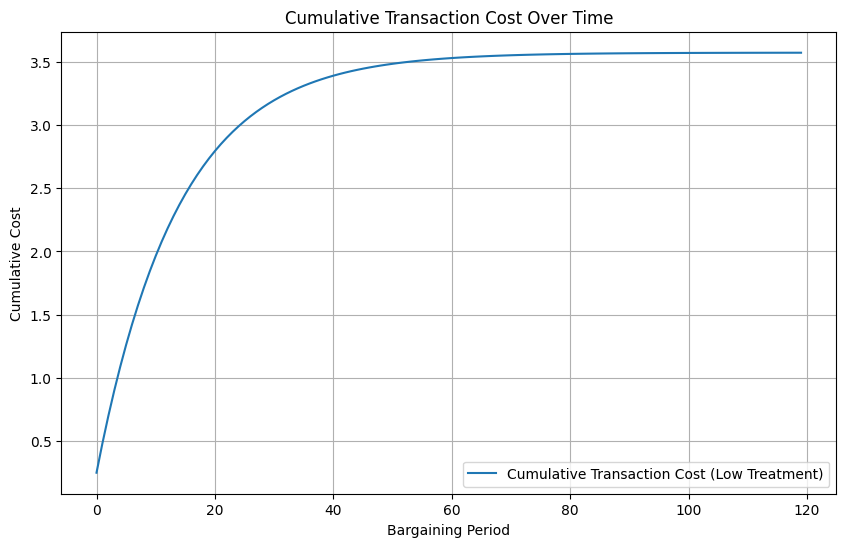

In [11]:
# Calculate the transaction costs for 120 seconds
total_bargaining_time = 120
total_cost_list, _ = calculate_transaction_costs(TA_treatment_high=False, total_bargaining_time=total_bargaining_time)

# Calculate cumulative cost over time
cumulative_cost = [sum(total_cost_list[:i+1]) for i in range(total_bargaining_time)]

# Plot the cumulative cost over time
plt.figure(figsize=(10, 6))
plt.plot(range(total_bargaining_time), cumulative_cost, label='Cumulative Transaction Cost (Low Treatment)')
plt.xlabel('Bargaining Period')
plt.ylabel('Cumulative Cost')
plt.title('Cumulative Transaction Cost Over Time')
plt.legend()
plt.grid(True)
plt.show()